In [1]:
import torchvision
DOWNLOAD_MNIST = True # If already download, set as False 
train_data = torchvision.datasets.MNIST(
    root= './mnist/',
    train=True, # this is training data
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST , 
)
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
# change the features to numpy
X_train = train_data.train_data.numpy() 
X_test = test_data.test_data.numpy()
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


4


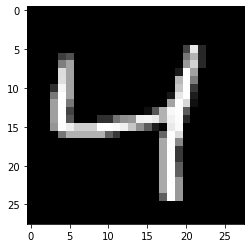

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2],cmap='gray')
print(Y_train[2])

It matches the lable in Y_train which are both 4.

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# normalization
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
print(np.amin(X_train),np.amax(X_train),np.amin(X_test),np.amax(X_test))
X_train_normalized= X_train/255
X_test_normalized= X_test/255

0 255 0 255


In [5]:

from tensorflow.keras.utils import to_categorical
Ytrain=to_categorical(Y_train)
Ytest=to_categorical(Y_test)




1. It is powerful to deal with non_ordinal labels or label's scale are very large.It is very expressive and easy to rescale.
2.  Because one hot encoding only contain 0 and 1, it will produce a very sparse matrix of target function
3. Lots of faster method is designed on sparse matrix.





In [6]:
from pandas.compat import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train=X_train_normalized.reshape(60000,28*28)
X_test=X_test_normalized.reshape(10000,28*28)

In [25]:
#KNN
clf_knn=KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train,Ytrain)
predknn=clf_knn.predict(X_test)
1-accuracy_score(Ytest,predknn)

0.04420000000000002

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [27]:
# adaboost and decision tree
adb=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=10),n_estimators=70)
adb.fit(X_train,Y_train)
Y_predadb=adb.predict(X_test)
1-accuracy_score(Y_test,Y_predadb)

0.040100000000000025

In [12]:
# SVM
from sklearn.svm import SVC
clf_svm=SVC(C=5,kernel='rbf')
clf_svm.fit(X_train,Y_train)
Y_svm=clf_svm.predict(X_test)
1-accuracy_score(Y_test,Y_svm)

0.015900000000000025

From the results, it is hard to reproduce the same results, but we can produce similar results. I think the reason that we cannot get the exactly same report results is because we don't know the hyperparameters they choose. Also we use normalized data to train the model which will get different test error.

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow import keras


In [8]:
X_train_reshape=X_train.reshape((60000,28,28,1))
X_test_reshape=X_test.reshape((10000,28,28,1))

In [9]:
def define_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10))
  #opt=SGD(learning_rate=0.001)
  model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  return(model)

In [14]:
cnn=define_model()
cnn.fit(X_train_reshape,Y_train,epochs=5)
cnn.evaluate(X_test_reshape,Y_test)

Epoch 1/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1306 - accuracy: 0.9596
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0428 - accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0296 - accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0299 - accuracy: 0.9911


[0.02994418889284134, 0.991100013256073]

By using CNN, the test error is about 0.89% which is out perform all three of the classifiers above.